<a href="https://colab.research.google.com/github/Doongwoooo/Dacon/blob/master/Dacon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, glob
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from keras.models import Sequential
import numpy as np
import pylab as plt

import re
patten_date = re.compile('\d{6}')

In [2]:
%tensorflow_version 2.x
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
  print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)
tf.tpu.experimental.initialize_tpu_system(tpu)
tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

Tensorflow version 2.4.1
Running on TPU  ['10.17.4.90:8470']
INFO:tensorflow:Initializing the TPU system: grpc://10.17.4.90:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.17.4.90:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [3]:
def sorted_list(path):
    tmplist = glob.glob(path)
    tmplist.sort()
    return tmplist

def read_csv(path):
    df = pd.read_csv(path)
    return df

def load_npy(path):
    npy = np.load(path)
    return npy

def show_data(npy):
    num_channel = npy.shape[-1]
    plt.figure(figsize=(3*num_channel, 5))
    for channel in range(num_channel):
        tmpimg = npy[:, :, channel]
        plt.subplot(1, num_channel, channel+1)
        plt.imshow(tmpimg)
    plt.tight_layout()
    plt.show()
    plt.close()

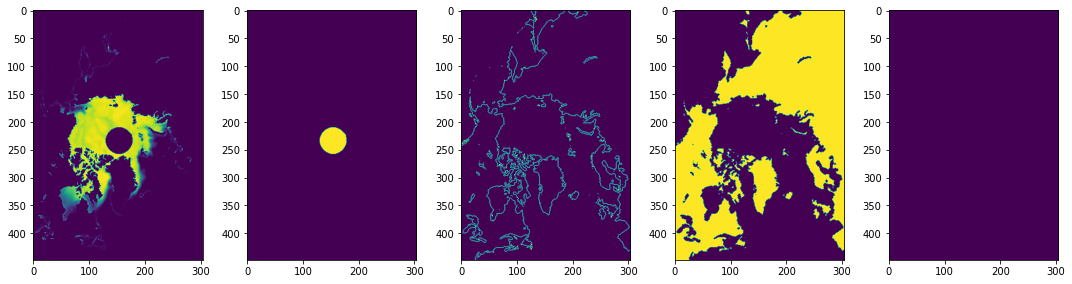

In [4]:
show_data(np.load('/content/drive/MyDrive/Dacon/train/197811.npy'))

In [5]:
folder = list(os.listdir('/content/drive/MyDrive/Dacon/train'))
print(len(folder))

482


In [6]:
X_map = []
X_mon = []
for file in folder:
    npy = load_npy('/content/drive/MyDrive/Dacon/train/' + file)
    X_map.append((npy[:, :, 0] + npy[:, :, 1])/250)
    date = str(patten_date.match(file))
    X_mon.append(date[-2:])

In [7]:
def generate_X(X_map, X_n):
    samples = []
    targets = []
    for i in range(len(X_map)-X_n):
        samples.append(X_map[i:i+X_n])
        targets.append(X_map[i+X_n])
    return samples, targets

In [8]:
samples, targets = generate_X(X_map,240)

In [9]:
len(samples)

242

In [10]:
len(targets)

242

In [11]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=1, verbose=1)

with tpu_strategy.scope():
    model = Sequential()
    model.add(tf.keras.Input(shape=(24, 448, 304, 1)))
    model.add(layers.ConvLSTM2D(filters=40, kernel_size=(3, 3), padding="same", return_sequences=True))
    model.add(layers.BatchNormalization())
    model.add(layers.ConvLSTM2D(filters=40, kernel_size=(3, 3), padding="same", return_sequences=True))
    model.add(layers.BatchNormalization())
    model.add(layers.ConvLSTM2D(filters=40, kernel_size=(3, 3), padding="same", return_sequences=True))
    model.add(layers.BatchNormalization())
    model.add(layers.ConvLSTM2D(filters=40, kernel_size=(3, 3), padding="same", return_sequences=True))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv3D(filters=1, kernel_size=(3, 3, 3), activation="sigmoid", padding="same"))
    model.compile(loss="mae", optimizer="Adam")

#    history = model.fit_generator()

    model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, 24, 448, 304, 40)  59200     
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 448, 304, 40)  160       
_________________________________________________________________
conv_lst_m2d_1 (ConvLSTM2D)  (None, 24, 448, 304, 40)  115360    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 448, 304, 40)  160       
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, 24, 448, 304, 40)  115360    
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 448, 304, 40)  160       
_________________________________________________________________
conv_lst_m2d_3 (ConvLSTM2D)  (None, 24, 448, 304, 40)  1

In [ ]:
model.fit(samples, targets, batch_size=100000, epochs=30, verbose=2, validation_split=0.1, callbacks=[callback])

In [ ]:
pred = model.predict(X_map[458:482])*250

In [ ]:
pred[0].reshape((448, 304, 1))

In [ ]:
show_data(np.load('/content/drive/MyDrive/Dacon/train/201801.npy'))

In [ ]:
show_data(pred[0].reshape((448, 304, 1)))

In [ ]:
len(pred)